<a href="https://colab.research.google.com/github/serialize02/2023final/blob/main/W11_0517_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Week 11.
<br>
Natural Language Processing 2</h1>

In [1]:
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (109/109), 13.39 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (32/32), done.


클론= 뒤 주소의 데이터를 이 컴퓨터에 복사해오겠다

! 가 붙은 애들 -> 파이썬 명령어가 아님
파이썬에서는 할 수 없지만 컴퓨터의 명령 창고에서 실행할 수 있는 작업을 하고 싶을 때

## Word count

<h3>Load data</h3>

In [2]:
import glob

text_paths = glob.glob("Harry-Potter-Text-Mining/Book Text/*.txt")

glob -> 우리가 필요한 파일들의 경로를 쉽게 찾아낼 수 있는 패키지 중 하나
~ 이 경로를 통해서 안에 있는 것들을 다 가져와줘
어떤 파일이든 txt로 끝나는 파일 다 가져와

In [3]:
import pandas as pd

df = pd.DataFrame()

for text_path in sorted(text_paths):
  text_df = pd.read_csv(text_path, sep="@")
  df = pd.concat([df, text_df])

df = df.reset_index().drop("index", axis=1)

sorted -> 리스트 안의 데이터 순서를 다 정렬해줌
read csv -> 표를 가져올 때 (txt도 상관 없음)
sep = @ 나누는 부호가 무엇인지를 알려줘 (기본적으로는 콤마로 끊음)
df 안에 데이터프레임을 세로로 쌓을 것임, 아래로 축적
concat -> 리스트 안에 들어온 두 데이터 프레임을 합쳐줌
첫번째 df는 비어있기 때문에, 그냥 뒤에꺼가 들어온 상태가 되는 거임 1~ 쭉

<h3>Tokenize</h3>

In [4]:
from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+")

In [5]:
df["Tokens"] = df["Text"].str.lower().apply(retokenize.tokenize)

apply= 각 row에 적용하고 싶은 작업을 함수의 형태로 넣어준다 / pandas에서 그에 맞는 편리한 함수를 적용하지 않았을 때 사용하는 방법

지금 Tokens 라는 새로운 column을 만드는것
기존에 있던 text라는 콜럼을 가져와서, 이 텍스트 안의 데이터들을 스트링으로 봐라, .lower -> 대문자들을 소문자로 바꿔라

<h3>Number of words in each book</h3>

In [6]:
df["WordCount"] = df["Tokens"].str.len()

wordcount라는 새로운 컬럼을 만든다, 각 챕터마다 몇개의 토큰이 쓰였는지에 대한 숫자값

각 row에 있는 토큰 리스트의 길이를 계산



groupby -> 책으로 묶어, 그리고 워드카운트라는 컬럼을 사용해 각 권 별 단어 개수가 나옴

데이터프레임은 2차원의 데이터

그런데 이 작업을 거친 데이터는 1차원, 대부분 시리즈
판자스에서 시리즈는 row 인덱스만 존재하고 컬럼이 존재하지 않음, book column이었던 친구가 여기서는 인덱스로 쓰이고 있음

그래서 이 1차원 데이터를 다시 2차원 데이터로 돌리는 작업이 reset_index -> 정보를 다시 원상복귀시킬 수 있음 다시 데이터프레임으로
인덱스가 다시 1~6으로 돌아오고, 인덱스로 쓰였던 book이 column으로 돌아옴

legend=false
xticks -> range(7) 내가 넣을 틱을 타이틀로 바꿔주는 용도

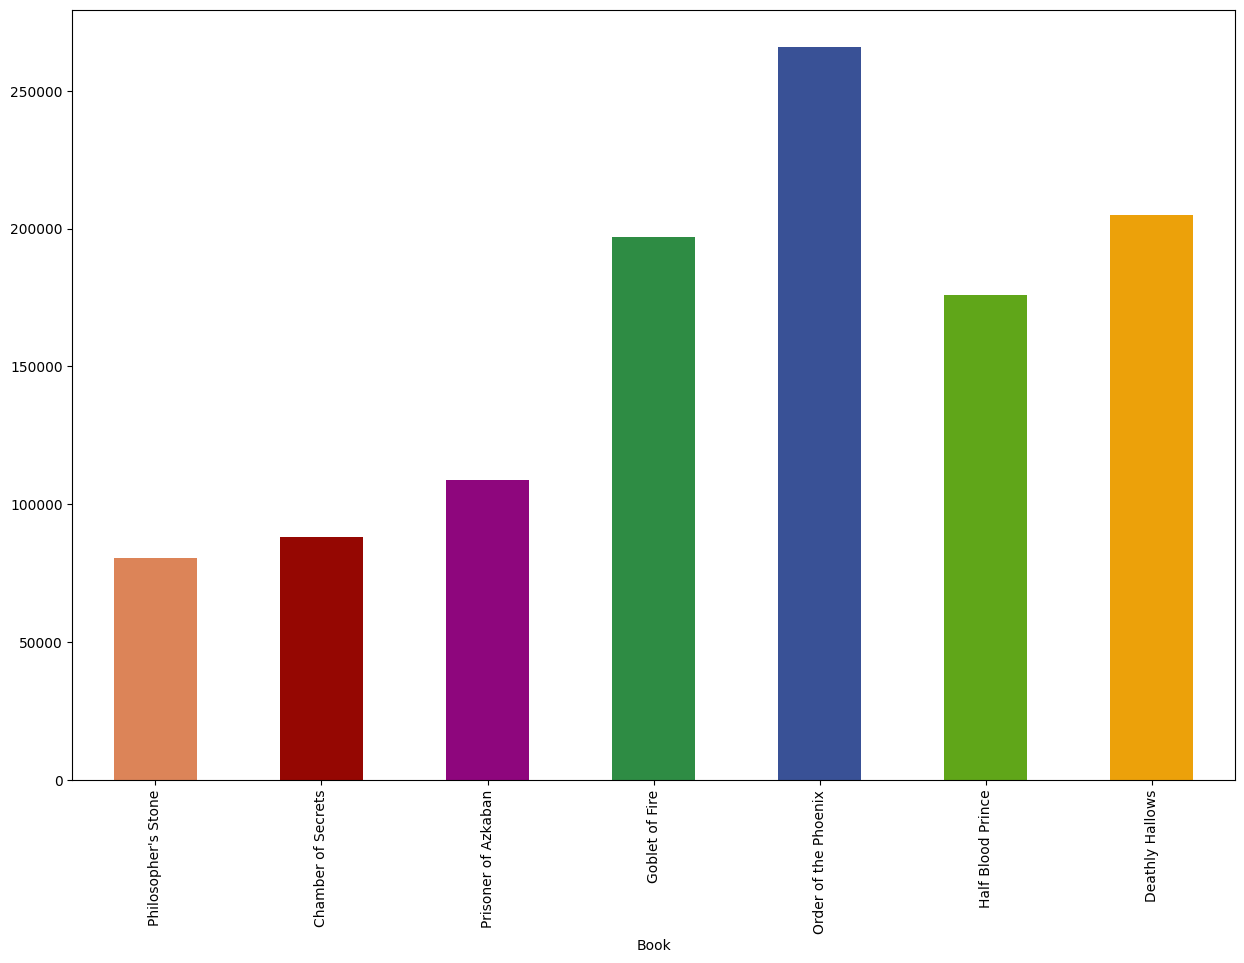

In [10]:
import matplotlib.pyplot as plt

titles=["Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire", "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

total_result = df.groupby("Book")["WordCount"].sum().reset_index()
total_result.plot(x="Book", y="WordCount", kind="bar", figsize=(15, 10), color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'], legend=False)

plt.xticks(range(7), titles)
plt.show()

<h3>Average number of words per chapter of each book</h3>

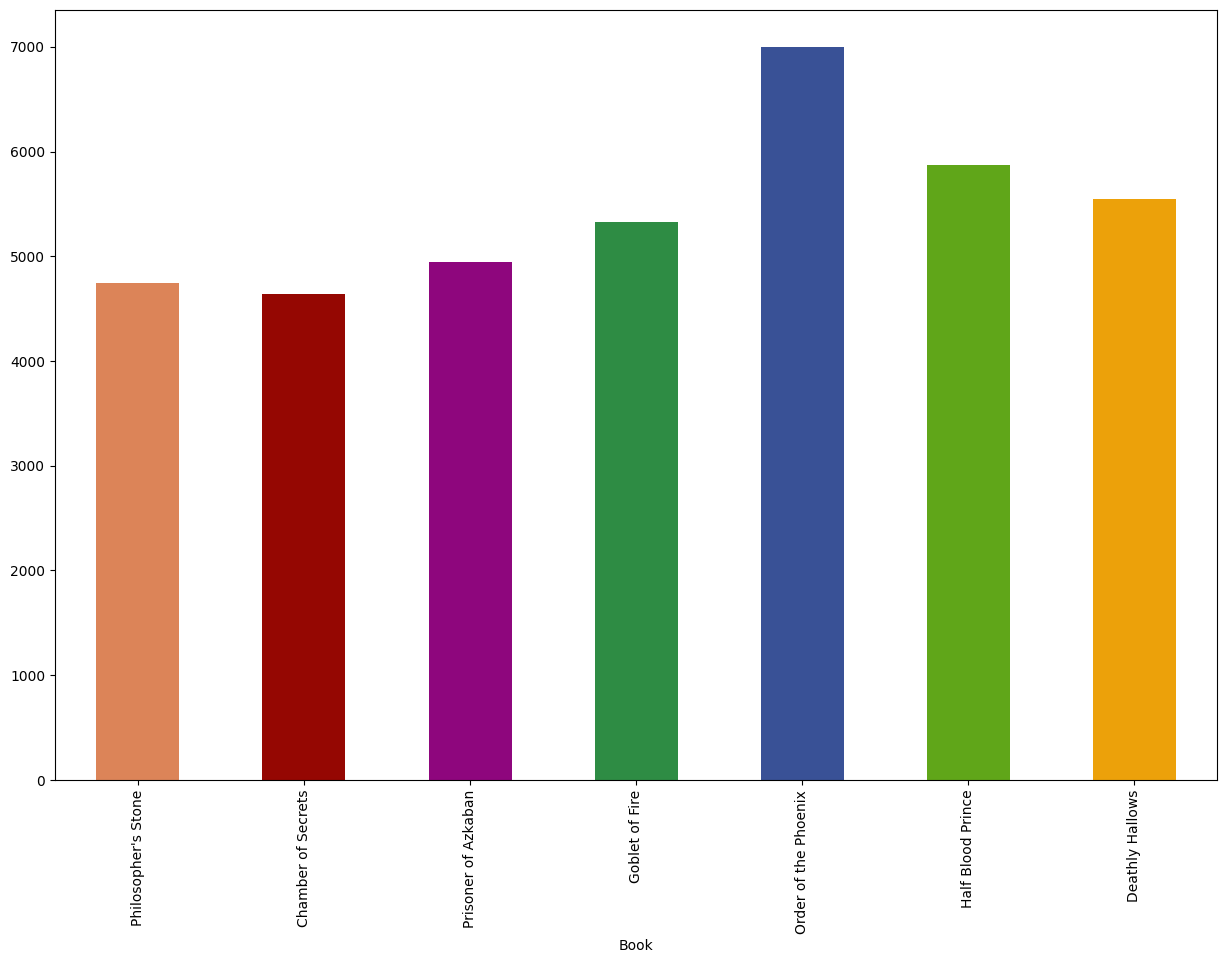

In [11]:
mean_result = df.groupby("Book")["WordCount"].mean().reset_index()
mean_result.plot(x="Book", y="WordCount", kind="bar", figsize=(15, 10), color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'], legend=False)

plt.xticks(range(7), titles)
plt.show()

<h3>Shortest chapter of each book</h3>

흥미로운 점은 7번 대비 총 단어의 개수는 1번 책이 현저히 적었는데, 1번책은 가장 짧은 챕터의 글자수가 3000자는 넘는 반면 7번 챕터는 2000 단어도 안됨

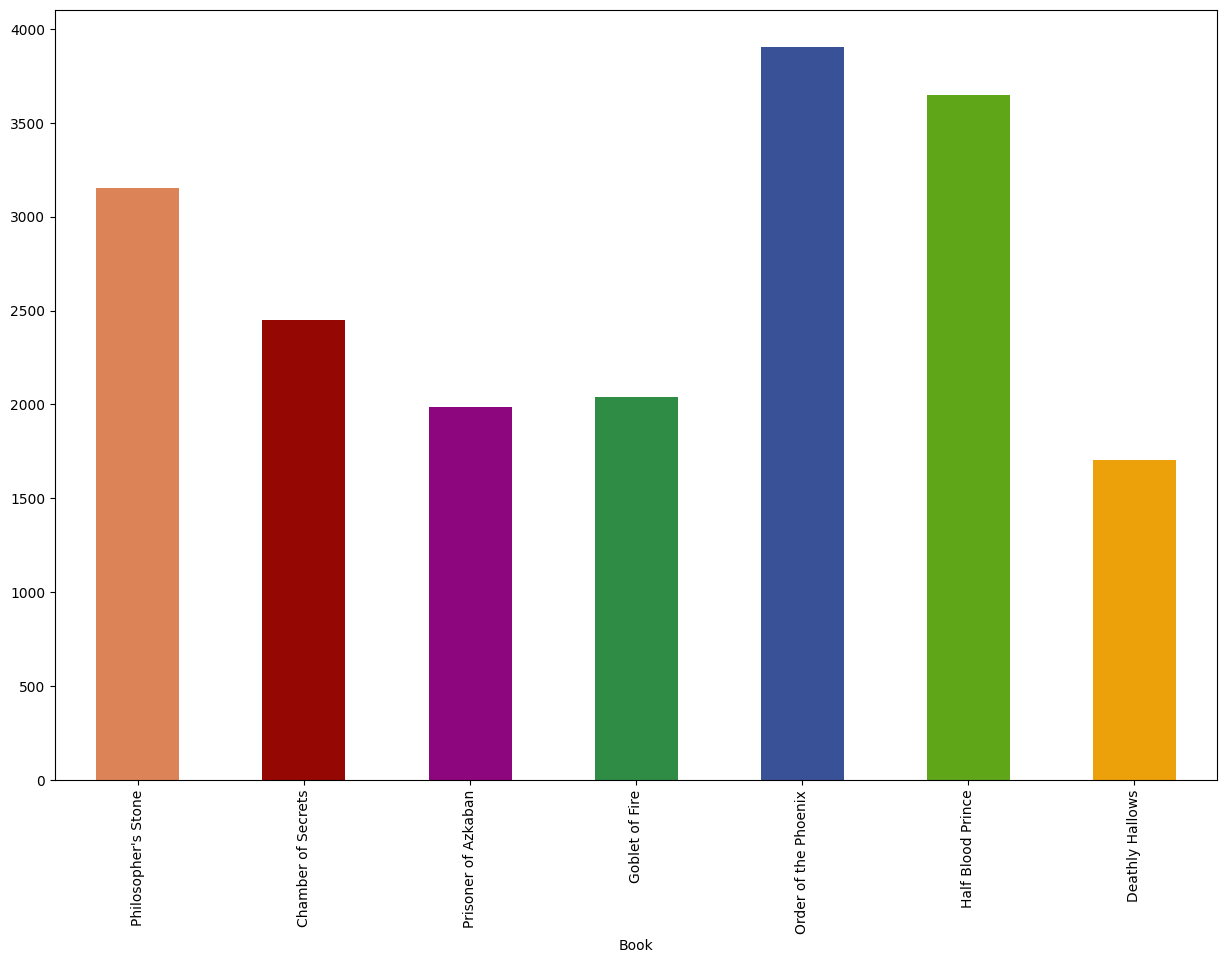

In [14]:
min_result = df.groupby("Book")["WordCount"].min().reset_index()
min_result.plot(x="Book", y="WordCount", kind="bar", figsize=(15, 10), color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'], legend=False)

plt.xticks(range(7), titles)
plt.show()

<h3>Longest chapter of each book</h3>

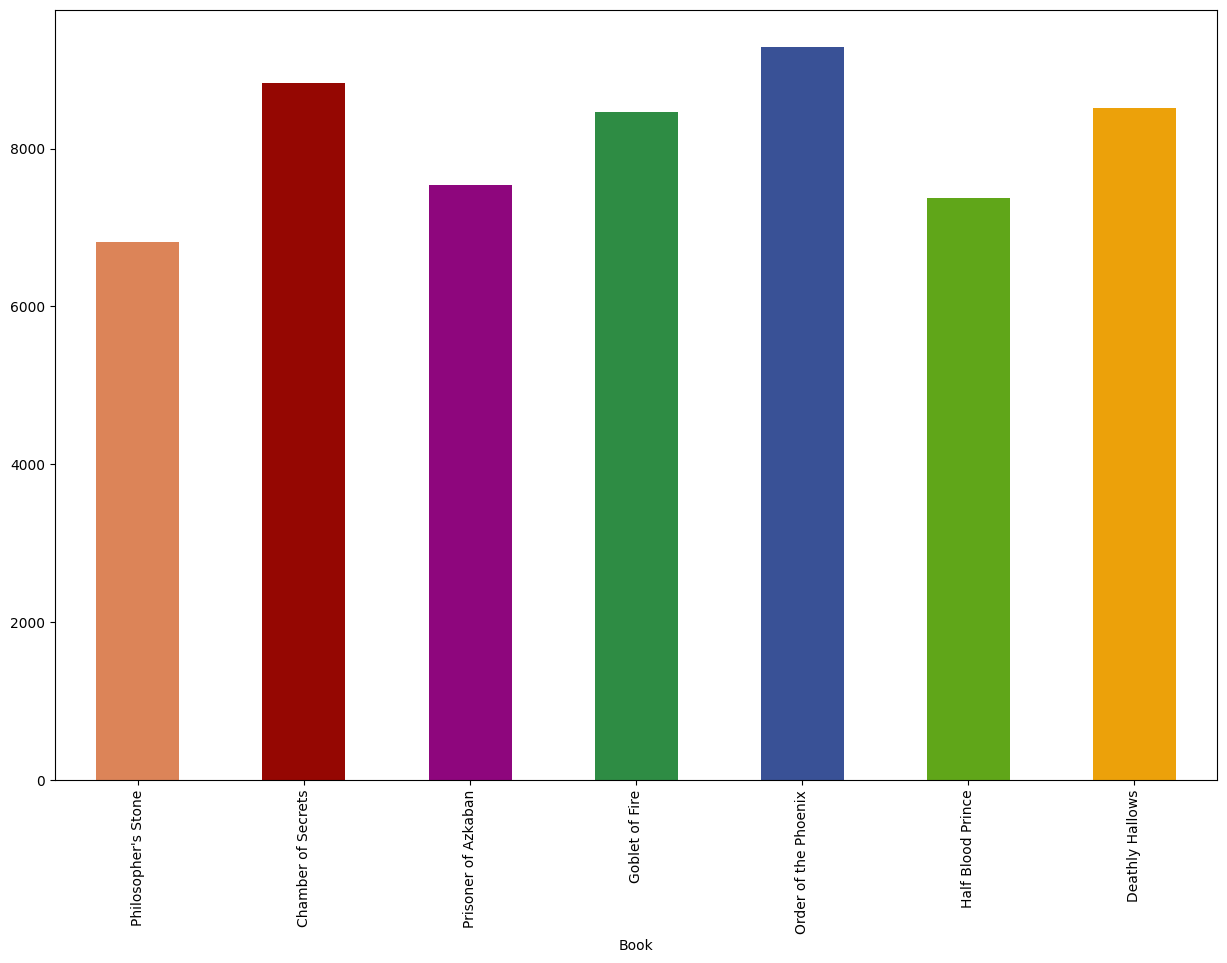

In [13]:
max_result = df.groupby("Book")["WordCount"].max().reset_index()
max_result.plot(x="Book", y="WordCount", kind="bar", figsize=(15, 10), color=['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'], legend=False)

plt.xticks(range(7), titles)
plt.show()

<h3>Shortest chapter of each book (DataFrame)</h3>

In [15]:
min_book = min_result["Book"]
min_word_count = min_result["WordCount"]

min_df = pd.DataFrame()

for b, wc in zip(min_book, min_word_count):
  min_df = pd.concat([min_df, df[(df["WordCount"] == wc) & (df["Book"] == b)]])

min_result 에서 book column만 가져온 것 -> min_book
min_df -> 빈 데이터프레임
for loop에서 변수 두개 쓰고, zip-> 리스트 두개가 있을 때 둘을 같이 넣어서 같은 인덱스에서 동시에 데이터를 뽑아내고 싶을 때 -> 쌍으로 묶여 튜플로 묶임

pd.concat -> 빈데이터프레임에 차곡차곡 쌓아가던 것

기존의 min_df 데이터프레임에 df에서 온 [] (이 안의 일부분을 가져온다는 뜻)
&-> logical operator 필터링 조건과 유사
앞과 뒤의 조건을 둘다 만족해야 하는 오퍼레이터
wc(같은 권끼리 묶어 최소분량의 챕터가 사용한 단어 개수)와 우리가 들고 있는 원본 데이터에서 각 row의 wordcount 이 두개가 일치하는 친구를 찾아
그리고 책의 권수
--> 이거 for loop 돌림

In [16]:
min_df

,Text,Chapter,Book,Tokens,WordCount
7,"THE POTIONS MASTER There, look.\ \""Where?\"" ...",8,1,"[the, potions, master, there, look, where, nex...",3155
30,"still, heart-shaped confetti was falling from ...",14,2,"[still, heart, shaped, confetti, was, falling,...",2450
55,THE DEMENTOR'S KISS Harry had never been pa...,20,3,"[the, dementor, s, kiss, harry, had, never, be...",1989
89,Harry felt his feet slam into the ground; h...,32,4,"[harry, felt, his, feet, slam, into, the, grou...",2041
130,The Only OneHe Ever Feared'He hasn't gone!' Ha...,36,5,"[the, only, onehe, ever, feared, he, hasn, t, ...",3907
160,Harry felt as though he too were hurtling thr...,28,6,"[harry, felt, as, though, he, too, were, hurtl...",3650
199,Autumn seemed to arrive suddenly that year. Th...,37,7,"[autumn, seemed, to, arrive, suddenly, that, y...",1703


<h3>Longest chapter of each book (DataFrame)</h3>

In [17]:
max_book = max_result["Book"]
max_word_count = max_result["WordCount"]

max_df = pd.DataFrame()

for b, wc in zip(max_book, max_word_count):
  max_df = pd.concat([max_df, df[(df["WordCount"] == wc) & (df["Book"] == b)]])

In [18]:
max_df

,Text,Chapter,Book,Tokens,WordCount
4,DIAGON ALLEY Harry woke early the next mornin...,5,1,"[diagon, alley, harry, woke, early, the, next,...",6817
35,"\What d'you mean, I won't be -?\"" \""I've wa...",19,2,"[what, d, you, mean, i, won, t, be, i, ve, wai...",8831
56,HERMIONE'S SECRET Shocking business... shoc...,21,3,"[hermione, s, secret, shocking, business, shoc...",7540
80,Despite the very heavy load of homework tha...,23,4,"[despite, the, very, heavy, load, of, homework...",8468
107,Dentention with DeloresDinner in the Great Hal...,13,5,"[dentention, with, deloresdinner, in, the, gre...",9295
150,The next day Harry confided in both Ron and H...,18,6,"[the, next, day, harry, confided, in, both, ro...",7380
195,"Harry remained kneeling at Snape's side, simpl...",33,7,"[harry, remained, kneeling, at, snape, s, side...",8515


## Sentiment analysis

책에 긍정적인 내용이 많은지 부정적 내용이 많은지, 중립적 내용이 많은지를 판단하는 것

sentiment intensity analyzer

In [19]:
# Create sent_df for sentiment analysis
# One sentence per row

from nltk import sent_tokenize
import nltk
import string

nltk.download("punkt")

# Create a new DataFrame `sent_df`
sent_df = df[["Book", "Chapter", "Text"]]
sent_df = pd.concat([sent_df, sent_df["Text"].apply(sent_tokenize).rename("Sentences")], axis=1)
sent_df = pd.concat([sent_df["Sentences"].apply(pd.Series), sent_df], axis=1)
sent_df = sent_df.drop(["Text", "Sentences"], axis=1)
sent_df = sent_df.melt(id_vars=["Book", "Chapter"], value_name="Sentence")
sent_df = sent_df.drop("variable", axis=1).dropna()

# Sort rows
sent_df = sent_df.sort_values(by=["Book", "Chapter"]).reset_index().drop(["index"], axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
# Remove punctuations from each sentence

def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, "")

  return text

sent_df["Sentence"] = sent_df["Sentence"].apply(remove_punctuations)

# Convert all letters to lowercase
sent_df["Sentence"] = sent_df["Sentence"].apply(lambda x: x.lower())

<h3>Load data</h3>

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
analyzer = nltk.sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<h3>Sentiment score</h3>

In [22]:
sent_df["Score"] = sent_df["Sentence"].apply(analyzer.polarity_scores)

In [23]:
sent_df["TotalScore"] = sent_df["Score"].apply(lambda x: x["compound"])
sent_df["PosScore"] = sent_df["Score"].apply(lambda x: x["pos"])
sent_df["NeuScore"] = sent_df["Score"].apply(lambda x: x["neu"])
sent_df["NegScore"] = sent_df["Score"].apply(lambda x: x["neg"])

딕셔너리 에서 뽑아와서 totalscore이라는 컬럼을 만들겠다

lambda -> 함수를 더 간단하게 한줄로 표현하는 것

In [24]:
sent_df = sent_df.drop(["Score"], axis=1)  # Drop the original score

sent_df["PosFlag"] = sent_df["TotalScore"].apply(lambda x: x >= 0.05)
sent_df["NeuFlag"] = sent_df["TotalScore"].apply(lambda x: x > -0.05 and x < 0.05)
sent_df["NegFlag"] = sent_df["TotalScore"].apply(lambda x: x <= -0.05)

drop -> score 딕셔너리 형태의 컬럼 필요 없어서 날림

종합점수로 긍정, 부정인지 종합점수의 크기를 보고 판단하는 comparison operator 사용

In [25]:
sent_df.groupby("Book")["TotalScore"].mean()

Book
1    0.019829
2    0.002223
3    0.005590
4    0.012213
5    0.007200
6    0.024172
7   -0.031744
Name: TotalScore, dtype: float64

In [26]:
print(f"There are {sent_df['PosFlag'].sum()} positive sentences.")
print(f"There are {sent_df['NegFlag'].sum()} negative sentences.")
print(f"There are {sent_df['NeuFlag'].sum()} neutral sentences.")

There are 19055 positive sentences.
There are 18385 negative sentences.
There are 33544 neutral sentences.


불리안에 해당된 컬럼들의 데이터를 더하면 컬럼 안의 true개수가 나옴

<h3>Visualization</h3>

전체적인 흐름을 알 수 있는 방법
책도 같고 챕터도 같은 애들끼리 그룹을 만들어라, total score .mean (평균),

여기서도 1차원의 데이터 시리즈로 나와서 챕터와 북이 하나의 인덱스로 쓰임
인덱스 두개가 쌍으로 묶인 1차원의 데이터 multi index
-> 이 경우 unstack을 쓰면 됨
챕터는 다시 index, book은 컬럼이 됨
subplots=true 각 컬럼마다 그래프를 분리
ylim 각 컬럼에서 숫자값의 범위를 정하는 것

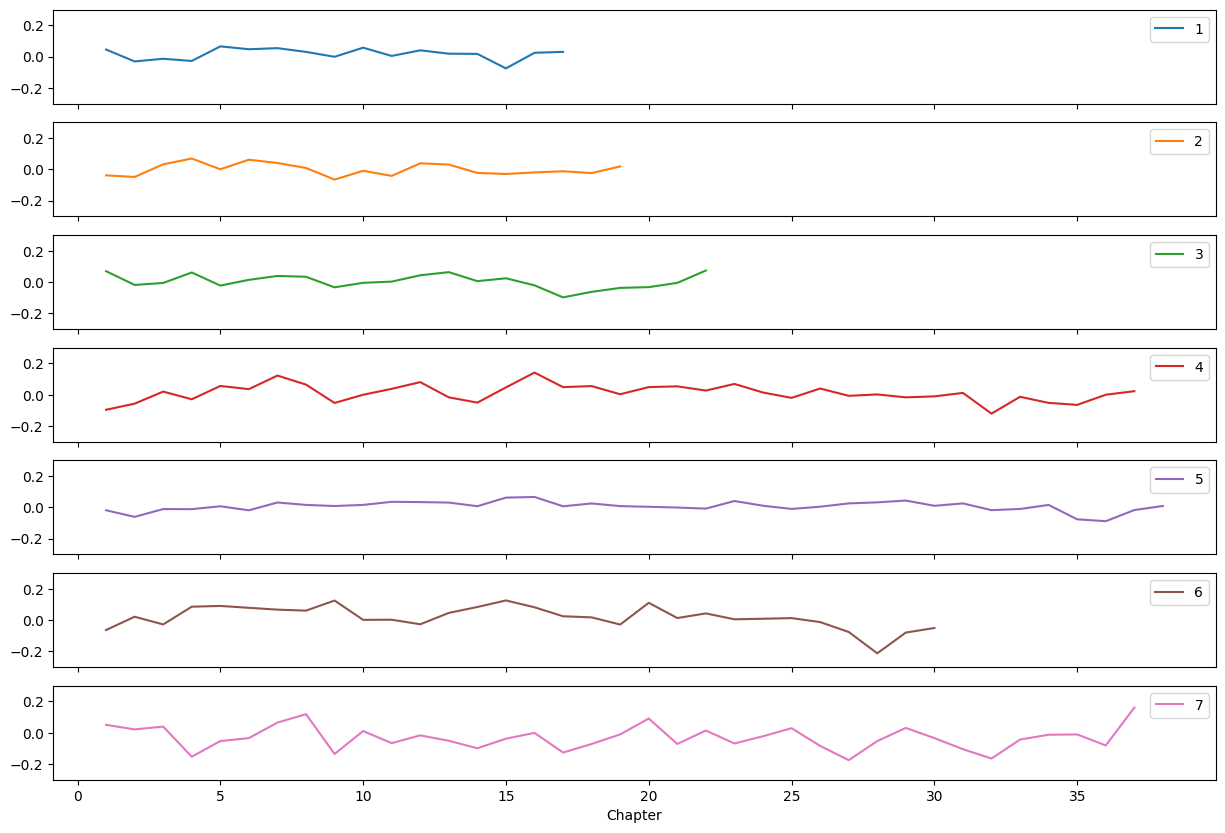

In [27]:
sent_df.groupby(["Chapter", "Book"])["TotalScore"].mean().unstack().plot(subplots=True, figsize=(15, 10), ylim=(-0.3, 0.3))
plt.show()